 # Introduction 

## About the Data Set 

The Food 101, is appropriately named! The data set contains images of food belonging to 101 categories. It contains a total of 101000 images. 

Each class has the following : 
1. 250 test images 
2. 750 training images

The training data is split into 20-80 split for validation and training respectively. 

The training images contain noise on purpose, to help build more robust models. The noise is the form of wrong labels and intense colours. All images have a maximum side length of 512 images. 

the structure of the data directory is explained in the repo, readme file. 


In [1]:
from fastai import *
from fastai.vision import *
import os
import tarfile
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Understanding the Data

We can view the data we are working with. This would give us a good understanding of how the pictures look, their names, shapes etc.

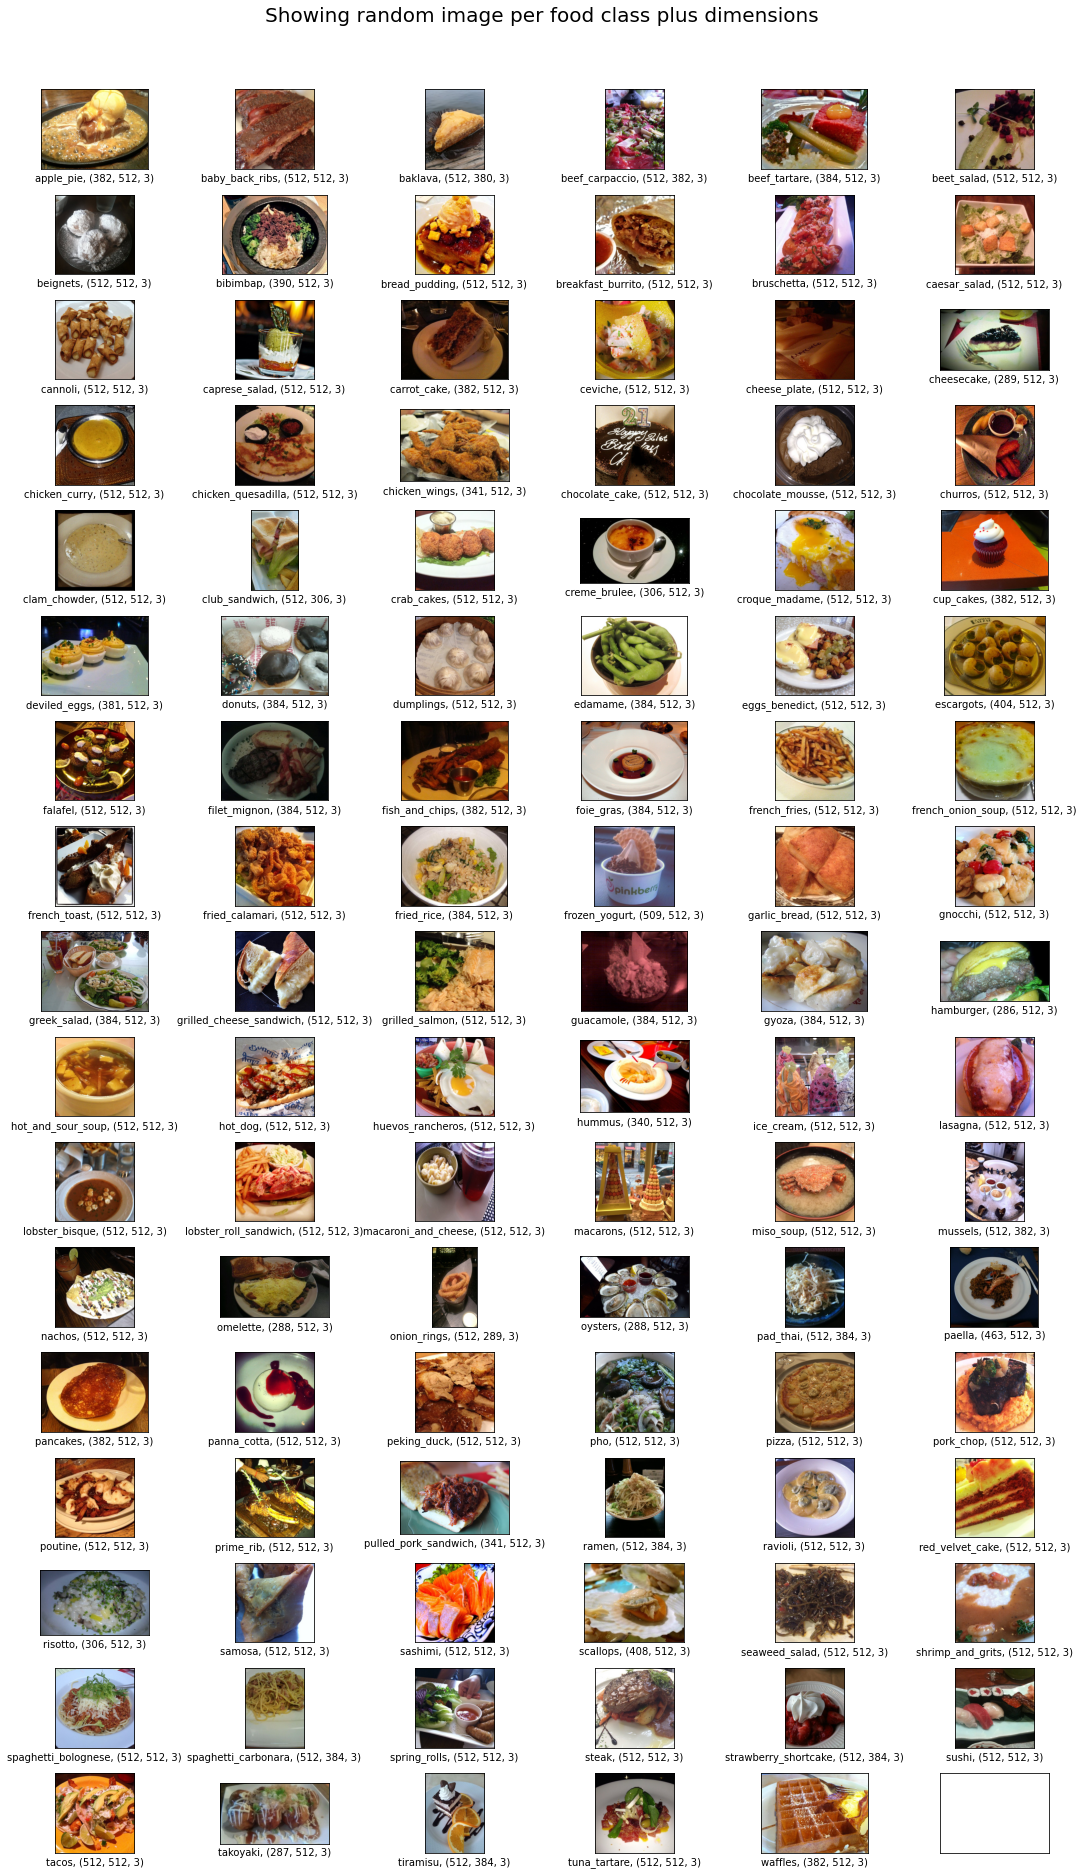

In [3]:

rows = 17
cols = 6
fig, axarr = plt.subplots(rows, cols, figsize=(15, 25))
fig.suptitle('Showing random image per food class plus dimensions', y=1.04, fontsize=20)
food_nr=0
for i in range(rows):
    for j in range(cols):
      try:
        rand_fn=np.random.choice(os.listdir(food_dir[food_nr]))
        img1 = plt.imread(os.path.join(food_dir[food_nr], rand_fn))
        axarr[i][j].imshow(img1)
        axarr[i][j].set_xlabel('%s, %s' % (sorted(os.listdir(data_dir))[food_nr], img1.shape))
        food_nr +=1
      except:
        break

plt.setp(axarr, xticks=[], yticks=[])
plt.tight_layout()

## All the pictures are of size : (512, 512) and contain 3 channels (RGB) 

In [4]:

for i in range(10):
  img=os.listdir(food_dir[0])[i]
  print(plt.imread(os.path.join(food_dir[0], img)).shape)

Shapes of a fiew apple pie images:
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 511, 3)


The lables of the data are contained in two .txt files where they are split into the training and testing data. 

In [ ]:
train_df = pd.read_csv('../input/food41/meta/meta/train.txt', header=None, names=['filename'])
train_df['class'] = train_df['filename'].apply(lambda x: x.split('/')[0])

In [6]:
train_df.head()

,filename,class
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


In [7]:
test_df = pd.read_csv('../input/food41/meta/meta/test.txt', header=None, names=['filename'])
test_df['class'] = test_df['filename'].apply(lambda x: x.split('/')[0])

In [8]:
test_df.head()

,filename,class
0,apple_pie/1011328,apple_pie
1,apple_pie/101251,apple_pie
2,apple_pie/1034399,apple_pie
3,apple_pie/103801,apple_pie
4,apple_pie/1038694,apple_pie


In [9]:
# parameters
architecture = models.resnet50
img_size = 224
bs = 64

# merge the train and test_df 
train_df['test'] = False
test_df['test'] = True
df = pd.concat([train_df, test_df], ignore_index=True)

## Data Augmentation 

Fast Ai allows data augmentation using the RandTrasnform which allows multiple types of transforms to be applied to the image dataset. This increases the datase variation and size. This helps build a more robust model

In [10]:
import sys
import fastai


path = '../input/food41/images'

ds_tfms = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.25, 0.25)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-20.0, 20.0)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.2), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.45, 0.6)}, p=0.7, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.90, 1.25)}, p=0.7, resolved={}, do_run=True, is_random=True)], 
           [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])

print(len(ds_tfms))


data = (ImageList.from_df(df, path, suffix ='.jpg')
                          .split_from_df(col='test')
                          .label_from_df(cols='class')
                          .transform(ds_tfms, size=img_size)
                          .databunch(bs=bs)).normalize(imagenet_stats)

print(len(ds_tfms))

2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [11]:
print('Check some statistics')
data.c, len(data.train_ds), len(data.valid_ds)

Check some statistics


(101, 75750, 25250)

### Lets check out an example of the augmented images!

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

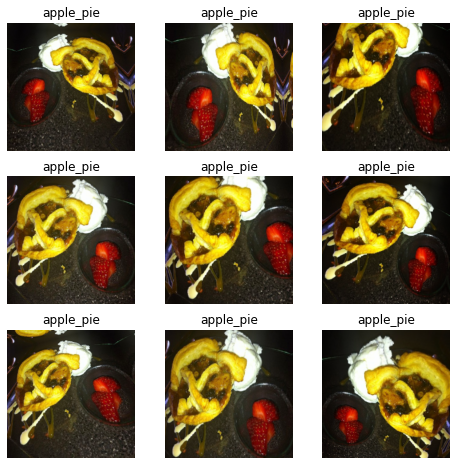

In [12]:
def plot_func(i,j,ax):
  x,y = data.train_ds[2]
  return x.show(ax, y=y)

plot_multi(plot_func, 3, 3, figsize=(8,8))

## Training 

I am using Fast.ai's CNN_LEARNER to implement a model for transfer learning. More about transfer learning in the readme.For this I am using a pre-trained RESNET-50 model that is trained on the ImageNet dataset.For measuring the model, I am checking the performance in terms of loss, validation loss, top 1 validation accuracy, top 5 validation accuracy. 

Learning Rate : it is important to use a suitable learning rate while training the model. For this I have used Fast.ai's lr.find to find the optimal learning rate. This helps in faster convergence of the loss. 

I am saving the weights frqeuently for ease of training

In [13]:
import warnings 
warnings.simplefilter("ignore")  

top_5_acc = partial(top_k_accuracy, k=5)
learn = cnn_learner(data, architecture, metrics=[accuracy, top_5_acc],
                    callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 4.79E-03


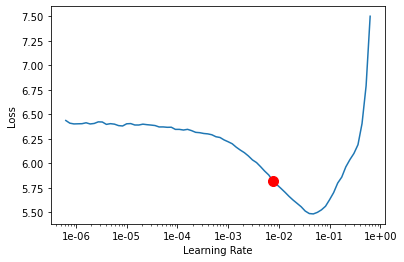

In [14]:
learn.model_dir='/kaggle/working/'
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.991670,1.347337,0.635406,0.883366,28:35
1,1.616225,1.083545,0.696990,0.914614,26:48
2,1.320547,0.856295,0.762812,0.938455,25:37
3,1.135947,0.788300,0.780594,0.945584,25:30


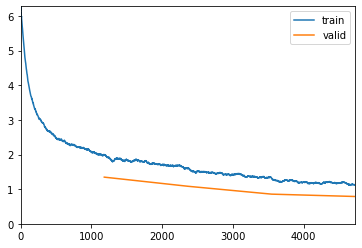

In [15]:
learn.fit_one_cycle(4, slice(1e-02))


In [16]:
learn.save('/kaggle/working/food-101-epoch-1-4-RK')


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 3.02E-06


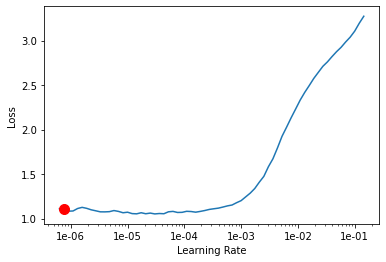

In [17]:
learn.load('/kaggle/working/food-101-epoch-1-4-RK')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.118234,0.740461,0.789030,0.950931,25:45
1,0.979771,0.650487,0.818059,0.959089,26:25
2,0.871723,0.622531,0.824040,0.961941,27:14


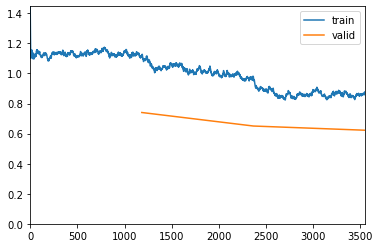

In [18]:

learn.fit_one_cycle(3, slice(3e-6,3e-4))
learn.save('/kaggle/working/food-101-epoch-5-7-RK')


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.31E-07


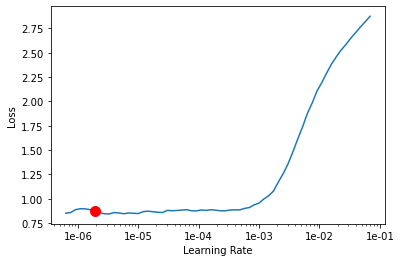

In [19]:
learn.load('/kaggle/working/food-101-epoch-5-7-RK')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,0.843288,0.618968,0.826614,0.961861,25:32
1,0.886388,0.619491,0.825624,0.961624,25:45
2,0.783923,0.599431,0.831921,0.962970,26:05
3,0.704002,0.572458,0.838614,0.967208,25:52
4,0.612525,0.550383,0.845386,0.968119,25:46
5,0.538029,0.539250,0.848238,0.968515,25:53
6,0.487903,0.535854,0.850653,0.968951,25:42


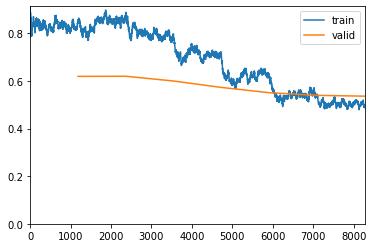

In [20]:
learn.load('/kaggle/working/food-101-epoch-5-7-RK')
learn.unfreeze()
learn.fit_one_cycle(7, slice(3e-6, 3e-4))
learn.save('/kaggle/working/food-101-epoch-8-14-RK')


In [21]:
learn.save('/kaggle/working/food-101-epoch-8-14-RK')

I have stopped the training after reaching >85 percent accuracy for top-1